In [1]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('circos_data.csv')
data['Mutation'] = data['Mutation'].str.strip()
data['Impact'] = data['Impact'].str.strip()
data

,FERM,Tumor Type,Mutation,Zscore,Impact,ID
0,FERMT1,Lung cancer,5UTR,-0.310523,High,1
1,FERMT1,Skin cancer,Downstream,-1.766332,High,2
2,FERMT1,Skin cancer,5UTR,-1.038679,High,3
3,FERMT1,Endometrial cancer,5UTR,0.024693,High,4
4,FERMT1,Skin cancer,Upstream,-1.110703,High,5
...,...,...,...,...,...,...
251,FERMT3,Brain cancer,Upstream,-0.132906,Low,252
252,FERMT3,Bladder cancer,Upstream,-0.192850,Low,253
253,FERMT3,Head and Neck cancer,Upstream,0.085690,Low,254
254,FERMT3,Renal cancer,Upstream,0.255114,Low,255


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data.iloc[:,0])
data['FERM'] = le.transform(data.iloc[:,0])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

le.fit(data.iloc[:,1])
data['Tumor Type'] = le.transform(data.iloc[:,1])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

le.fit(data.iloc[:,2])
data['Mutation'] = le.transform(data.iloc[:,2])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

le.fit(data.iloc[:,4])
data['Impact'] = le.transform(data.iloc[:,4])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

data['Zscore'] = [(x - min(data['Zscore'])) / (max(data['Zscore']) - min(data['Zscore'])) for x in data['Zscore']]
data

{'FERMT1': 0, 'FERMT2': 1, 'FERMT3': 2}
{'Bladder cancer': 0, 'Blood cancer': 1, 'Brain cancer': 2, 'Breast Cancer': 3, 'Breast cancer': 4, 'Cervical cancer': 5, 'Colon Cancer': 6, 'Colon cancer': 7, 'Endometrial cancer': 8, 'Gastric cancer': 9, 'Head and Neck cancer': 10, 'Liver cancer': 11, 'Lung cancer': 12, 'Malignant Lymphoma': 13, 'Oral cancer': 14, 'Ovarian cancer': 15, 'Pancreatic cancer': 16, 'Pediatric Brain Tumor': 17, 'Prostate cancer': 18, 'Rectal cancer': 19, 'Renal Cancer': 20, 'Renal cancer': 21, 'Skin cancer': 22}
{'3UTR': 0, '5UTR': 1, 'Downstream': 2, 'Exon': 3, 'Intron': 4, 'SpliceRegion': 5, 'Start Gained': 6, 'StartLost': 7, 'Stop Gained': 8, 'StopLost': 9, 'Upstream': 10}
{'High': 0, 'Low': 1}


,FERM,Tumor Type,Mutation,Zscore,Impact,ID
0,0,12,1,0.250782,0,1
1,0,22,2,0.042262,0,2
2,0,22,1,0.146486,0,3
3,0,8,1,0.298796,0,4
4,0,22,10,0.136170,0,5
...,...,...,...,...,...,...
251,2,2,10,0.276223,1,252
252,2,0,10,0.267637,1,253
253,2,10,10,0.307533,1,254
254,2,21,10,0.331800,1,255


In [4]:
data1 = data[data['FERM'] == 0].dropna()
data2 = data[data['FERM'] == 1].dropna()
data3 = data[data['FERM'] == 2].dropna()
data1['Mutation'].unique()

array([ 1,  2, 10,  5,  0])

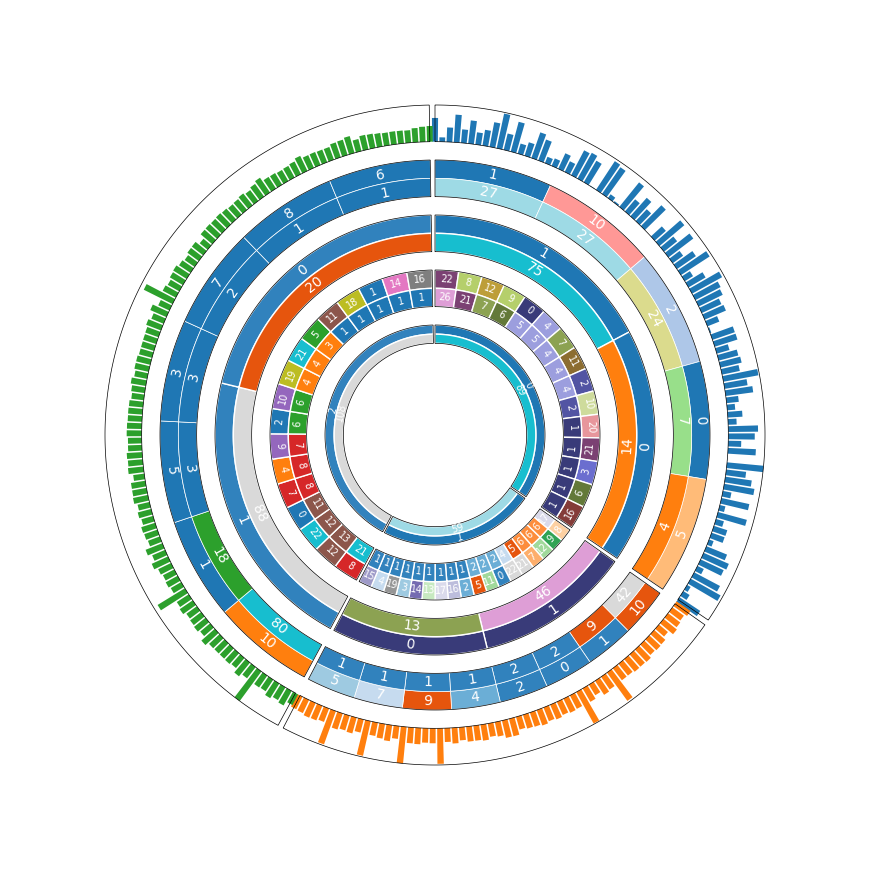

In [6]:
sectors = {"FERMT1": data1.shape[0], "FERMT2": data2.shape[0], "FERMT3": data3.shape[0]}
circos = Circos(sectors, space=1)

data_u2 = data1.iloc[:,0].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[0]
track_u2 = sector_u2.add_track((25,30))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=7, color="white"), cmap="tab10", rect_kws=dict(ec="white", lw=1))

data_u2 = data2.iloc[:,0].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[1]
track_u2 = sector_u2.add_track((25,30))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=7, color="white"), cmap="tab20", rect_kws=dict(ec="white", lw=1))

data_u2 = data3.iloc[:,0].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[2]
track_u2 = sector_u2.add_track((25,30))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=7, color="white"), cmap="tab20c", rect_kws=dict(ec="white", lw=1))

data_u2 = data1.iloc[:,1].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[0]
track_u2 = sector_u2.add_track((35,45))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=7, color="white"), cmap="tab20b", rect_kws=dict(ec="white", lw=1))

data_u2 = data2.iloc[:,1].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[1]
track_u2 = sector_u2.add_track((35,45))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=7, color="white"), cmap="tab20c", rect_kws=dict(ec="white", lw=1))

data_u2 = data3.iloc[:,1].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[2]
track_u2 = sector_u2.add_track((35,45))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=7, color="white"), cmap="tab10", rect_kws=dict(ec="white", lw=1))

data_u2 = data1.iloc[:,4].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[0]
track_u2 = sector_u2.add_track((50,60))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=10, color="white"), cmap="tab10", rect_kws=dict(ec="white", lw=1))

data_u2 = data2.iloc[:,4].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[1]
track_u2 = sector_u2.add_track((50,60))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=10, color="white"), cmap="tab20b", rect_kws=dict(ec="white", lw=1))

data_u2 = data3.iloc[:,4].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[2]
track_u2 = sector_u2.add_track((50,60))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=10, color="white"), cmap="tab20c", rect_kws=dict(ec="white", lw=1))

data_u2 = data1.iloc[:,2].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[0]
track_u2 = sector_u2.add_track((65,75))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=10, color="white"), cmap="tab20", rect_kws=dict(ec="white", lw=0.5))

data_u2 = data2.iloc[:,2].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[1]
track_u2 = sector_u2.add_track((65,75))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=10, color="white"), cmap="tab20c", rect_kws=dict(ec="white", lw=0.5))

data_u2 = data3.iloc[:,2].value_counts()
data_u2 = data_u2.reset_index()
data_u2.columns = ['x','y']
data_u2x = data_u2['x'].tolist()
data_u2y = data_u2['y'].tolist()
data_u2x = [int(i) for i in data_u2x]
data_u2y = [int(i) for i in data_u2y]
data_b = np.array([data_u2x, data_u2y])
sector_u2 = circos.sectors[2]
track_u2 = sector_u2.add_track((65,75))
track_u2.axis()
track_u2.heatmap(data_b, show_value=True, text_kws=dict(size=10, color="white"), cmap="tab10", rect_kws=dict(ec="white", lw=0.5))

data_a2 = data1.iloc[:,3].tolist()
data_a2 = [float(i) for i in data_a2]
data_a2 = [i+1 for i in data_a2]
data_a2 = [np.log2(i) for i in data_a2]
sector_a2 = circos.sectors[0]
track_a2 = sector_a2.add_track((80,90))
track_a2.axis()
x_a2 = np.linspace(track_a2.start, track_a2.end, len(data_a2))
y_a2 = data_a2
track_a2.bar(x_a2, y_a2)

data_a2 = data2.iloc[:,3].tolist()
data_a2 = [float(i) for i in data_a2]
data_a2 = [i+1 for i in data_a2]
data_a2 = [np.log2(i) for i in data_a2]
sector_a2 = circos.sectors[1]
track_a2 = sector_a2.add_track((80,90))
track_a2.axis()
x_a2 = np.linspace(track_a2.start, track_a2.end, len(data_a2))
y_a2 = data_a2
track_a2.bar(x_a2, y_a2)

data_a2 = data3.iloc[:,3].tolist()
data_a2 = [float(i) for i in data_a2]
data_a2 = [i+1 for i in data_a2]
data_a2 = [np.log2(i) for i in data_a2]
sector_a2 = circos.sectors[2]
track_a2 = sector_a2.add_track((80,90))
track_a2.axis()
x_a2 = np.linspace(track_a2.start, track_a2.end, len(data_a2))
y_a2 = data_a2
track_a2.bar(x_a2, y_a2)

fig = circos.plotfig()

plt.savefig('circos_kindlin.png', dpi=600, bbox_inches='tight')